In [6]:
df.head()

,index,customer_placed_order_time,restaurant_confirmed_time,driver_at_restaurant_time,pickup_time,delivered_time,driver_id,restaurant_id,customer_id,delivery_city,...,month_det,ordered_date,delivered_date,day_week_ordered,day_week_delivered,deliver_order_diff,res_confirm_order_dif,pickup_deliver_diff,res_confirm_pickup_diff,driver_res_pickup_diff
0,126,3/13/12 11:49,3/13/12 12:01,3/13/12 12:13,3/13/12 12:24,3/13/12 12:34,207,217,5910,Mountain View,...,3,2012-03-13,2012-03-13,tuesday,tuesday,45,12.0,10,23.0,11.0
1,127,3/9/12 11:42,3/9/12 11:47,NaN,3/9/12 12:23,3/9/12 12:23,177,303,89492,Campbell,...,3,2012-03-09,2012-03-09,friday,friday,41,5.0,0,36.0,NaN
2,128,3/16/12 17:17,3/16/12 18:12,NaN,3/16/12 18:56,3/16/12 19:06,205,270,10412,San Jose,...,3,2012-03-16,2012-03-16,friday,friday,109,55.0,10,44.0,NaN
3,129,3/10/12 12:10,3/10/12 12:11,3/10/12 12:23,3/10/12 12:34,3/10/12 12:49,232,170,89259,San Jose,...,3,2012-03-10,2012-03-10,saturday,saturday,39,1.0,15,23.0,11.0
4,130,3/10/12 14:51,3/10/12 16:04,3/10/12 16:25,3/10/12 16:30,3/10/12 16:45,328,7,92041,Palo Alto,...,3,2012-03-10,2012-03-10,saturday,saturday,114,73.0,15,26.0,5.0


In [6]:
df['is_asap'].head()

0    t
1    t
2    f
3    t
4    f
Name: is_asap, dtype: object

In [7]:
df['delivery_city']=df['delivery_city'].fillna(method='ffill')

(35, 77)

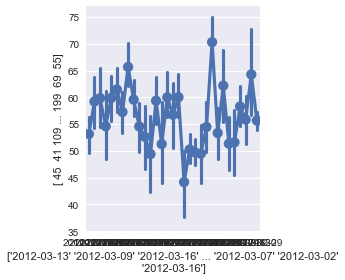

In [8]:
#planning to consider the non-null values in the time columns for now:

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset
df_door = sns.factorplot(x=df['ordered_date'].values, y=df['deliver_order_diff'].values, data=df)
plt.ylim(35, 77)



In [9]:
#both dates are not the same. have to count the number of cases where they are not same
df[df['ordered_date']==df['delivered_date']].count()

#driver_at_restaurant_time and driver_res_pickup_diff are equal to 13368. and the rest of the values are equal to 17816. But
#both driver_at_restaurant_time and driver_res_pickup_diff have null values
#remember this: count also involve negative values for time!

index                         17816
customer_placed_order_time    17816
restaurant_confirmed_time     17616
driver_at_restaurant_time     13368
pickup_time                   17816
delivered_time                17816
dasher_id                     17816
restaurant_id                 17816
customer_id                   17816
delivery_city                 17816
is_asap                       17816
order_total                   17816
discount_amount               17816
final_order_total             17816
tip_amount                    17816
refund_amount                 17816
month_det                     17816
ordered_date                  17816
delivered_date                17816
day_week_ordered              17816
day_week_delivered            17816
deliver_order_diff            17816
res_confirm_order_dif         17616
pickup_deliver_diff           17816
res_confirm_pickup_diff       17616
driver_res_pickup_diff        13368
dtype: int64

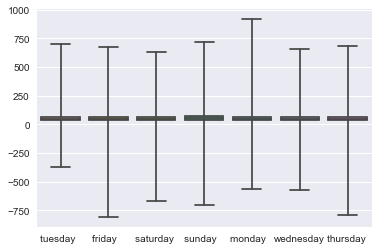

In [11]:
#visualizing the difference in time between customer ordered time and restaurant confirmed time over day-of-week
import numpy as np
sns.boxplot(x=df['day_week_delivered'].values, y=df['deliver_order_diff'].values, data=df, whis=np.inf)

In [12]:
#y1 represents deliver_order_diff (the difference between customer_placed_order_time and the delivered time)
x1, y1=df.day_week_delivered[df['deliver_order_diff']>=0], df.deliver_order_diff[df['deliver_order_diff']>=0]

In [13]:
len(x1)

17924

In [14]:
len(y1)

17924

In [15]:
#In order to use the 'is_asap' column of the dataframe to understand the spread of delivery delay, I have to also get the same size for the column
#similar to the size(len) of x1 and y1
s1=df.is_asap[df['deliver_order_diff']>=0]

In [16]:
#to check the len of s1:
len(s1)

17924

(30, 80)

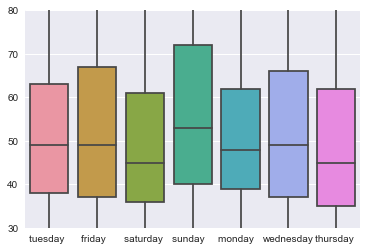

In [17]:
# only considering the positive values of df.deliver_order_diff
sns.boxplot(x=x1.values, y=y1.values, data=df, whis=np.inf)
plt.ylim(30,80)
# but this does not make sense to learn patterns. so going to filter the values more to get decent
# output

(55, 70)

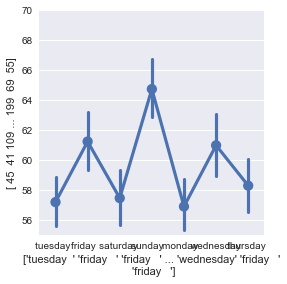

In [18]:
#visualized the below one using x1 & y1
df_door_jun5 = sns.factorplot(x=x1.values, y=y1.values, data=df)
plt.ylim(55, 70)

#The lines above and below the dots seem like the spread of confidence intervals
#Sunday, Wednesday, Friday (all three in order of higher magnitude): skewed towards higher values

In [105]:
# fig, ax = plt.subplots(figsize=(3, 3))
# #plt.fig.subplots_adjust()
# fig = plt.figure()
# fig.subplots_adjust(bottom = 0)
# fig.subplots_adjust(top = 1)
# fig.subplots_adjust(right = 1)
# fig.subplots_adjust(left = 0)
# with sns.axes_style(style='ticks'): 
#     g = sns.boxplot(x1, y1, data=df[['day_week_delivered','deliver_order_diff','is_asap']], hue=s1)
#     g.set_axis_labels(x1, y1);


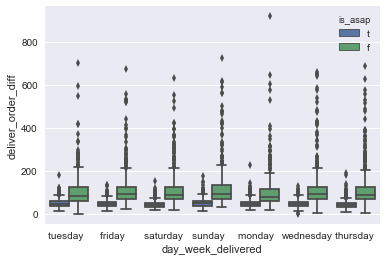

In [19]:
#day_week_delivered Vs. deliver_order_diff
import matplotlib as mpl
g = sns.boxplot(x=x1, y=y1, hue=s1, data=df)
sns.despine(left=True)


#interpretation
# Looking at the plot below it is clear that the median and the range of delivery delay is higher when case:is_asap=False
# than when case:is_asap=True (as expected). The plot clearly shows the outliers too. The non_outlier positive values for
# Tuesday and Sunday looks skewed to higher positive values and they both look relatively similar. Further investigation in
# this direction might render more useful insights.

(0, 230)

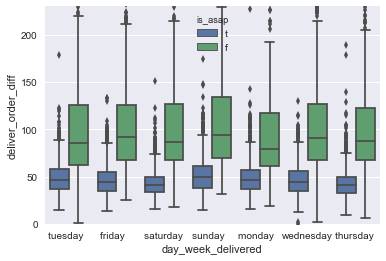

In [20]:
#day_week_delivered Vs. deliver_order_diff
#Going change the scale of y-axis to zoom-in within 0 to 215 min range
import matplotlib as mpl
g = sns.boxplot(x=x1, y=y1, hue=s1, data=df)
#sns.despine(left=True)
plt.ylim(0, 230)

(0, 180)

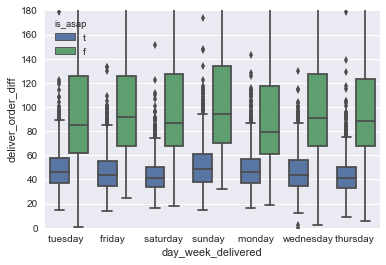

In [21]:
#day_week_delivered Vs. deliver_order_diff
import matplotlib as mpl
g = sns.boxplot(x=x1, y=y1, hue=s1, data=df)
#sns.despine(left=True)
plt.ylim(0, 180)

#interpretation
#The lowest non_outlier positive value lies well below 20 minutes and that is efficient delivery!

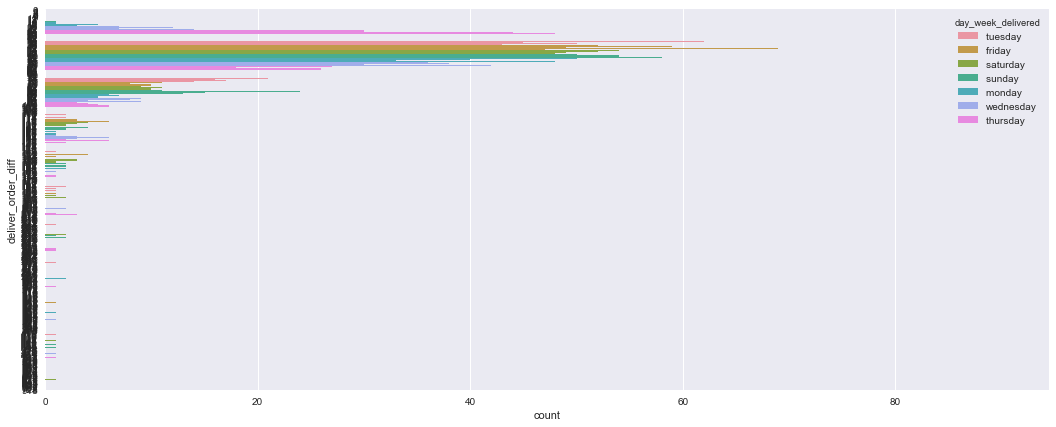

In [69]:
#day_week_delivered Vs. deliver_order_diff
#going to try countplot
plt.figure(figsize=(18,7))
#f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y=y1, hue=x1, data=df);

In [27]:
#Why box plot?
# Box plot shows the range of the spread in quartiles form: showing how many points fall well within the range of 75% (third quartile)
# It also gives a good idea of how many outliers are there outside the non_outlier values (both above and below)

#going to visualize the rest of the time difference values:



In [22]:
#res_confirm_order_dif Vs. day_week_ordered
#y2 represents res_confirm_order_dif (the difference between restaurant_confirmed_time and the customer_placed_order_time)
#x2 represents day_week_ordered (dow when order was placed)
#I am considering only the positive values(df['res_confirm_order_dif']>0)
x2, y2, s2=df.day_week_ordered[df['res_confirm_order_dif']>0], df.res_confirm_order_dif[df['res_confirm_order_dif']>0], df.is_asap[df['res_confirm_order_dif']>0]



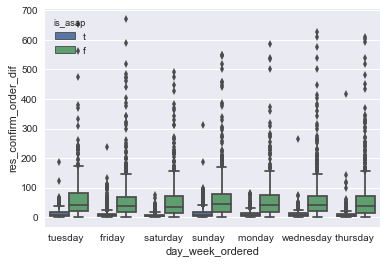

In [23]:
#res_confirm_order_dif Vs. day_week_ordered
import matplotlib as mpl
g2 = sns.boxplot(x=x2, y=y2, hue=s2, data=df)
#sns.despine(left=True)


(0, 100)

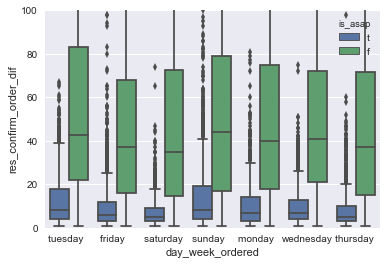

In [24]:
#res_confirm_order_dif Vs. day_week_ordered
#Important point to remember: I am considering only the positive values for now
g2 = sns.boxplot(x=x2, y=y2, hue=s2, data=df)
plt.ylim(0, 100)

# Tuesday and Sunday: restaurants take from approx 10 to 20 min to confirm customer order
# Saturday: restaurants seem to keep time taken to confirm customer order well under 10 minutes
# Maybe counting the number of orders (is_asap=True) during dow would be useful

(0, 20)

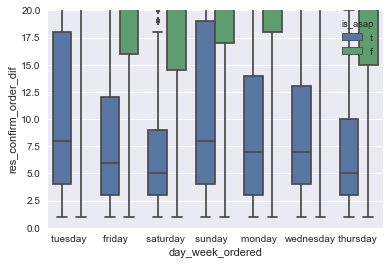

In [25]:

#res_confirm_order_dif Vs. day_week_ordered #more zoom-in
g2 = sns.boxplot(x=x2, y=y2, hue=s2, data=df)
plt.ylim(0, 20)

# What does a box plot tell us?
# It shows where the median falls in each category: For Tuesday the median falls around 7.6 min approx.
# It also shows as minimum and maximum
# It can be seen that 50% of data falls within the range of 4.5 to 17.7 min (approx)

(0, 43)

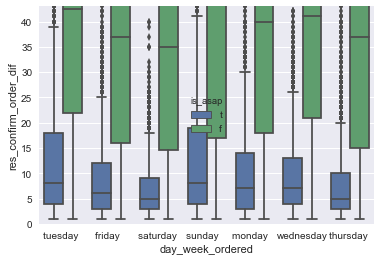

In [26]:
#res_confirm_order_dif Vs. day_week_ordered #more zoom-in 
#To check the spread of the top 25% of data: let us just concentrate on is_asap = t for now
g2 = sns.boxplot(x=x2, y=y2, hue=s2, data=df)
plt.ylim(0, 43)

# For Tuesday the top 25% falls within the range of (is_asap=True) 18 to 39 min approx
# For Sunday the top 25% falls within the range of (is_asap=True) 18 to 42 min approx
# For Monday the top 25% falls within the range of (is_asap=True) 14 to 30 min approx

# Another thing to notice is that there are not many cases in the lower 25% region

# Could check the trend for Friday and Saturday  - particularly interesting!

# For Friday the top 25% falls within the range of (is_asap=True) 13 to 25 min approx

# For Saturday the top 25% falls within the range of (is_asap=True) 9 to 18 min approx
# So the obvious question is: what is the motivation for the restaurants to confirm so quickly on Fridays and Saturdays?
# Another thing to remember: This plot has both Feb and March data

In [28]:
#res_confirm_order_dif Vs. day_week_ordered going to analyze monthly basis

x21, y21, s21=df.day_week_ordered[df['res_confirm_order_dif']>0], df.res_confirm_order_dif[df['res_confirm_order_dif']>0], df.month_det[df['res_confirm_order_dif']>0]

(0, 50)

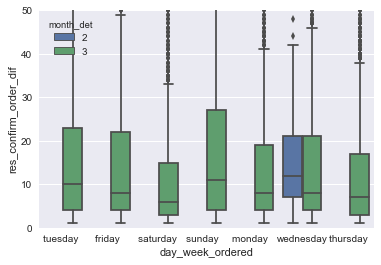

In [29]:
g2 = sns.boxplot(x=x21, y=y21, hue=s21, data=df)
plt.ylim(0, 50)
#Feb 29 was a Wednesday



In [30]:
#res_confirm_order_dif Vs. day_week_ordered going to analyze monthly basis

df1=df.loc[(df['res_confirm_order_dif']>0) & (df['is_asap']=='t') & (df['month_det']==3)]



In [32]:
x22, y22, s22=df1.day_week_ordered, df1.res_confirm_order_dif, df1.customer_id

In [34]:
df3=pd.DataFrame(df1.groupby(['delivery_city','day_week_ordered','ordered_date','res_confirm_order_dif'])['customer_id'].agg(np.sum)).reset_index()


In [35]:
# g22 = sns.boxplot(x=x22, y=y22, hue=s22, data=df)
#plt.ylim(0, 45)

df3.head()#this one doesn't have restaurant_id


,delivery_city,day_week_ordered,ordered_date,res_confirm_order_dif,customer_id
0,Atherton,friday,2012-03-02,1.0,24891
1,Atherton,friday,2012-03-02,2.0,70453
2,Atherton,friday,2012-03-02,3.0,49146
3,Atherton,friday,2012-03-02,4.0,78887
4,Atherton,friday,2012-03-02,5.0,9986


In [36]:
df3['res_confirm_order_dif'].max()

416.0

In [37]:
df3['res_confirm_order_dif'].min()

1.0

In [38]:
I think the num_order calculated this way is wrong!
df31=pd.DataFrame({'num_order' : df1.groupby( ['delivery_city','day_week_ordered','ordered_date','res_confirm_order_dif', 'customer_id']).size()}).reset_index()

In [39]:
df31.head()

,delivery_city,day_week_ordered,ordered_date,res_confirm_order_dif,customer_id,num_order
0,Atherton,friday,2012-03-02,1.0,24891,1
1,Atherton,friday,2012-03-02,2.0,3118,1
2,Atherton,friday,2012-03-02,2.0,67335,1
3,Atherton,friday,2012-03-02,3.0,49146,1
4,Atherton,friday,2012-03-02,4.0,78887,1


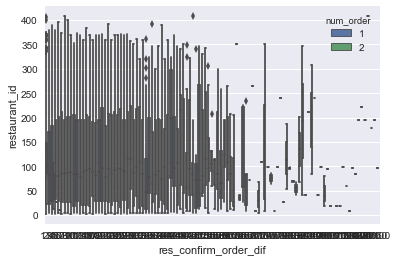

In [88]:
#plt.figure(figsize=(18,18))
g24=sns.boxplot(x=df32_res['res_confirm_order_dif'], y=df32_res['restaurant_id'], hue=df32_res['num_order'],data=df32_res)
# plt.ylim(0, 10)
#The below graph is not useful! because there a lot of restaurant_id to be able to plot clearly

In [94]:

#Number of restaurants that took more than 40 min to confirm customer orders: now this prompts for another insight: how many
#orders were delivered from this window
df32_res.restaurant_id[(df['res_confirm_order_dif']>40)].count()


1419

In [97]:
#continuing from immediate above: to get the number of orders that were delivered with more than 40 min confirm time
#it could mean there were only one order in every row in this window of analysis or the result is wrong
df32_res.num_order[(df['res_confirm_order_dif']>40)].sum()

1419

In [95]:
#which cities got less than 3o min confirm time? the pattern is mixed. but 'Monte Sereno' city is clearly in the less than 30 minute confirm window.
df32_res.delivery_city[(df['res_confirm_order_dif']<30)].unique()

array(['Atherton', 'Campbell', 'East Palo Alto', 'Los Altos',
       'Los Altos Hills', 'Los Gatos', 'Menlo Park', 'Monte Sereno',
       'Mountain View', 'Palo Alto', 'San Jose', 'Stanford', 'Sunnyvale',
       'West Menlo Park'], dtype=object)

In [96]:
# But Monte Sereno city is missing in the less than 15 min window whereas the other cities are mixed in the three windows
# that i have analyzed so far
df32_res.delivery_city[(df['res_confirm_order_dif']<15)].unique()

array(['Atherton', 'Campbell', 'East Palo Alto', 'Los Altos',
       'Los Altos Hills', 'Los Gatos', 'Menlo Park', 'Mountain View',
       'Palo Alto', 'San Jose', 'Stanford', 'Sunnyvale',
       'West Menlo Park'], dtype=object)

In [103]:
#to plot customer_id, restaurant_id, and num_order - can come back to this later
# plt.figure(figsize=(18,7))
# g_res=sns.boxplot(x=df32_res['customer_id'], y=df32_res['restaurant_id'], hue=df32_res['num_order'],data=df32_res)
# plt.ylim(0, 36)

In [ ]:
#Also have to know customer_id, time (this could be either confirm or deliver), and num_order per customer

In [104]:
df32_res.head()

,delivery_city,day_week_ordered,ordered_date,res_confirm_order_dif,restaurant_id,customer_id,num_order
0,Atherton,friday,2012-03-02,1.0,324,24891,1
1,Atherton,friday,2012-03-02,2.0,27,67335,1
2,Atherton,friday,2012-03-02,2.0,249,3118,1
3,Atherton,friday,2012-03-02,3.0,70,49146,1
4,Atherton,friday,2012-03-02,4.0,7,78887,1


In [170]:
#This is not what i wanted_ with regards to count of order per customer
#df_new_res=pd.DataFrame(df1.groupby(['delivery_city','day_week_ordered','ordered_date','restaurant_id','res_confirm_order_dif', 'res_confirm_pickup_diff', 'pickup_deliver_diff','deliver_order_diff', 'customer_id']))

In [121]:
def rolling_count(val):
    if val == rolling_count.previous:
        rolling_count.count +=1
    else:
        rolling_count.previous = val
        rolling_count.count = 1
    return rolling_count.count
rolling_count.count = 0 #static variable
rolling_count.previous = None #static variable


In [130]:
df1.loc[:, 'count_cust_order'] = df1['customer_id'].apply(rolling_count) 

/Users/chidam/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [132]:
#Now this is the right array of count values that are calculated on customer_id
df1['count_cust_order'].unique()

array([1, 2, 3, 4, 5, 6])

(0, 100)

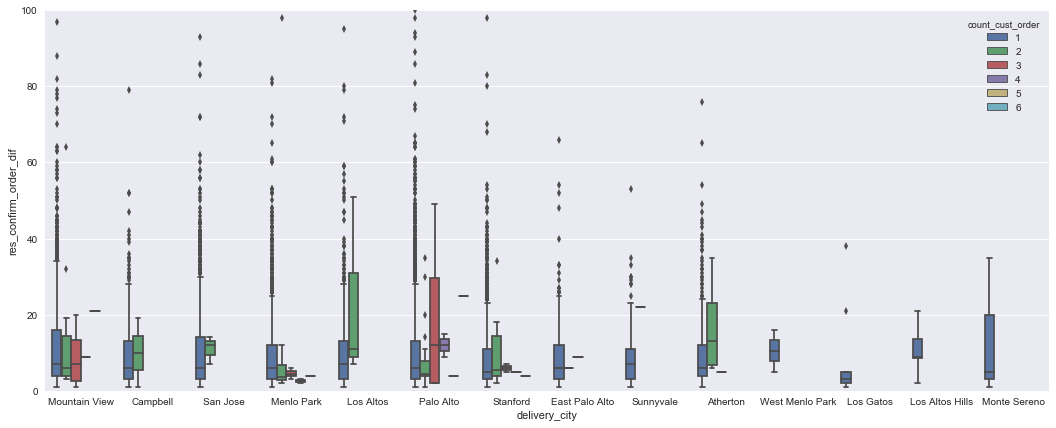

In [135]:
plt.figure(figsize=(18,7))
sns.boxplot(x=df1['delivery_city'], y=df1['res_confirm_order_dif'], hue=df1['count_cust_order'],data=df1)
plt.ylim(0, 100)

(0, 53)

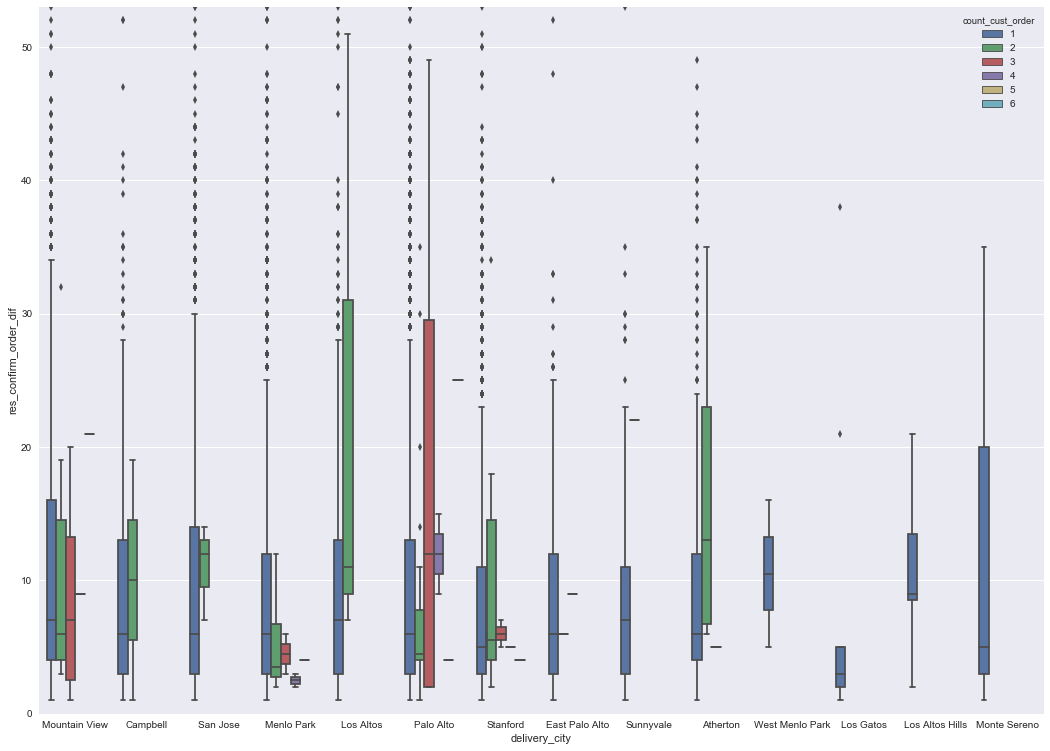

In [139]:
#res_confirm_order_dif Vs. count_cust_order

plt.figure(figsize=(18,13))
sns.boxplot(x=df1['delivery_city'], y=df1['res_confirm_order_dif'], hue=df1['count_cust_order'],data=df1)
plt.ylim(0, 53)




(1, 120)

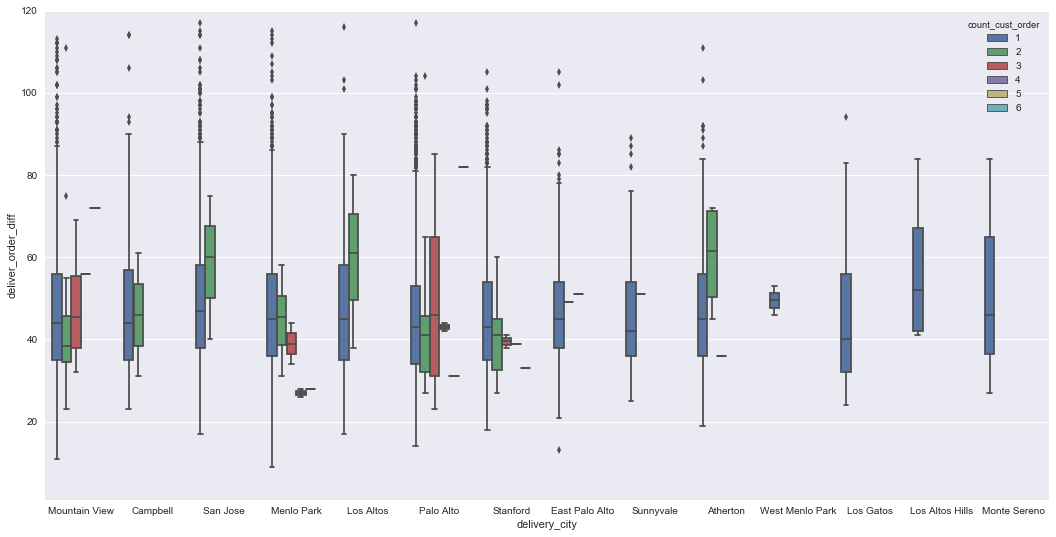

In [145]:

plt.figure(figsize=(18,9))
sns.boxplot(x=df1['delivery_city'], y=df1['deliver_order_diff'], hue=df1['count_cust_order'],data=df1)
plt.ylim(1, 120)

(5, 90)

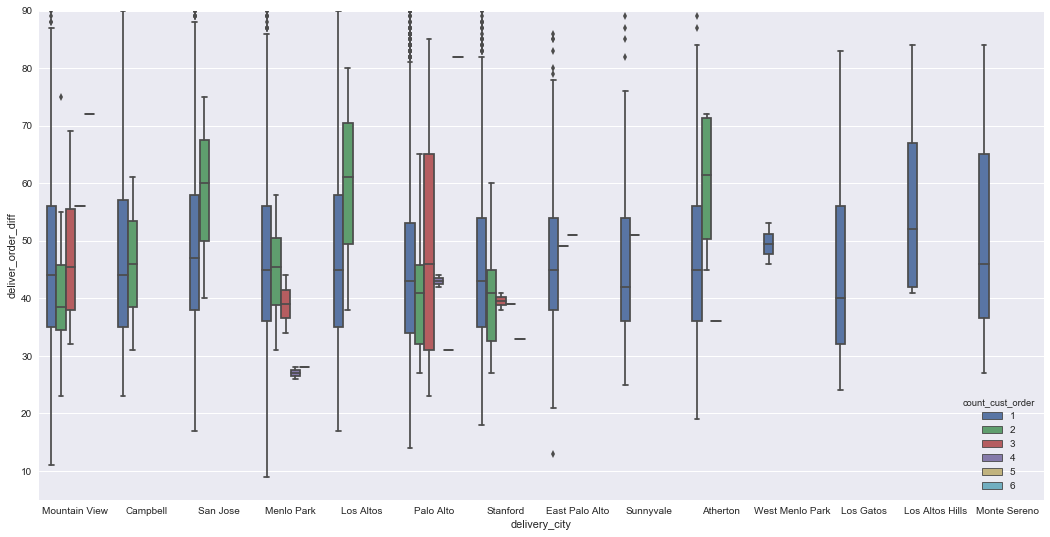

In [150]:
#deliver_order_diff Vs. count_cust_order

plt.figure(figsize=(18,9))
sns.boxplot(x=df1['delivery_city'], y=df1['deliver_order_diff'], hue=df1['count_cust_order'],data=df1)
plt.ylim(5, 90)

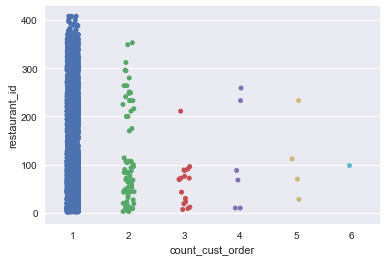

In [163]:
#Number of time customers placed orders in March: 6 orders were placed at restaurant_id: 100

sns.stripplot(x=df1['count_cust_order'], y=df1['restaurant_id'], data=df1, jitter=True);

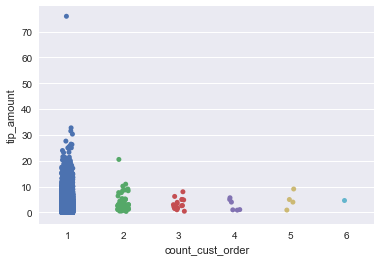

In [218]:
sns.stripplot(x=df1['count_cust_order'], y=df1['tip_amount']/100, data=df1, jitter=True);
#Looks like people who have ordered often (more than once) paid low tip compared to people who bought once. This is an 
# interesting trend to watch for. Ultimately you want customers to tip drivers according to their
# convenience as it motivates drivers to delivery fast and in turn to do more number of delivery. 

In [188]:
#Have to check pickup_deliver_diff > 1 hour and get details like: dasher_id, delivery city 

#To get details on pickup_deliver_diff > 1 hour:
    

y_calc=df1.pickup_deliver_diff[df1['pickup_deliver_diff'] > 60]

x_calc=df1.driver_id[df1['pickup_deliver_diff'] > 60]



In [200]:
#to visualize the tip amount when the time between the pickup and delivery is more than 60 min
t_calc=df1.tip_amount[df1['pickup_deliver_diff'] > 60]



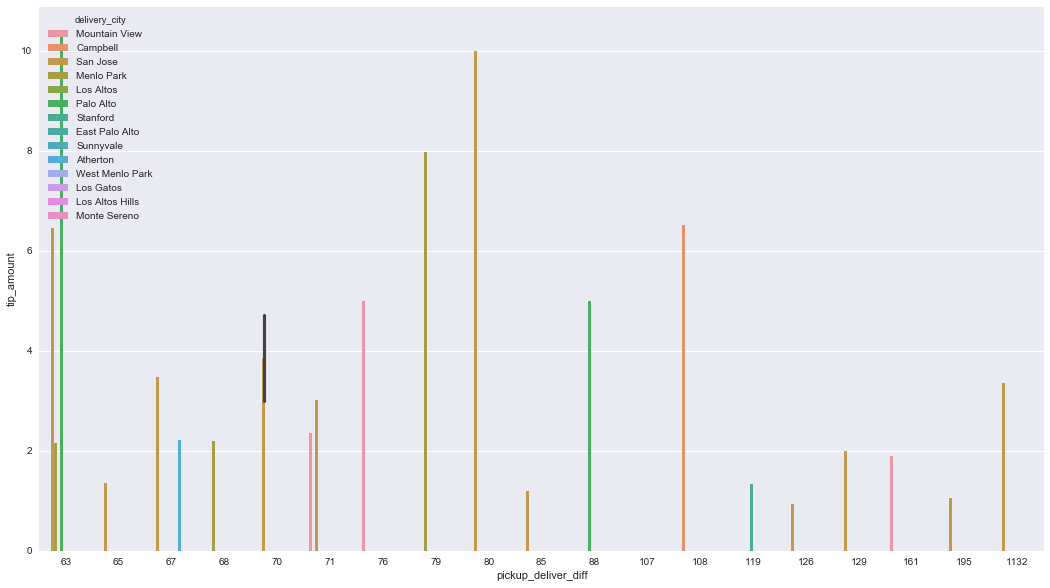

In [221]:
#t_calc Vs. x_calc 
plt.figure(figsize=(18,10))
sns.barplot(x=y_calc, y=t_calc/100, hue=df1['delivery_city'], data=df1)

#Mixed behavior can be seen: either 1132 is an outlier or it can be seen that the tip amount is less than $4 as expected(although not comparing with the ordered amount of the food this doesn't make much sense)
#but for below 63 min only $2 approx. is tipped. Tip_amount gets lesser when time exceeds more than an hour. It might make more sense to
#compare this plot with the one plotted using time less than 60 min. 

In [223]:
#To visualize tip_amount against time taken to deliver provided time taken to deliver after picking up the food < 60 min  

y_calc_less60=df1.pickup_deliver_diff[df1['pickup_deliver_diff'] < 60]

x_calc_less60=df1.driver_id[df1['pickup_deliver_diff'] < 60]

t_calc_less60=df1.tip_amount[df1['pickup_deliver_diff'] < 60]


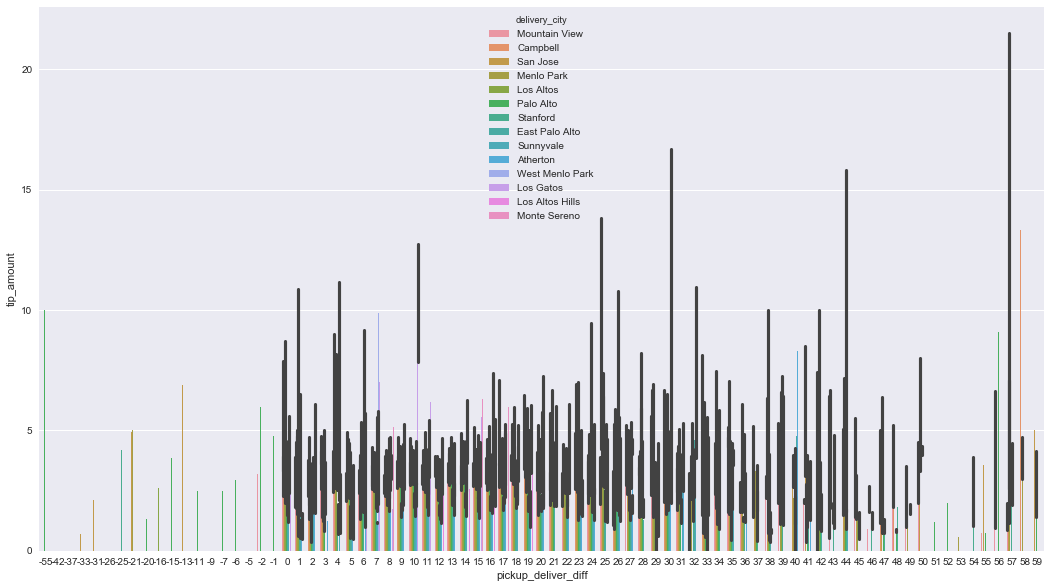

In [224]:
#Tip_amount Vs. Time taken to deliver after picking up food provided the time < 60 min
plt.figure(figsize=(18,10))
sns.barplot(x=y_calc_less60, y=t_calc_less60/100, hue=df1['delivery_city'], data=df1)

# There is no clear sign that if drivers deliver food faster they will be tipped well. Most of the tip_amount in this category falls well
# in the range of $8 approx. May be tipping behavior depends on other factors: significant of them is total amount for which food
# was ordered.


In [198]:
# Add res_confirm_order_dif and driver_res_pickup_diff to find out restaurant_id that took more than a 45 min
# why add? because those two values mean that restaurants took time to get food to drivers


df1['res_tot_time']=df1['res_confirm_order_dif'] + df1['driver_res_pickup_diff'].fillna(0)

/Users/chidam/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [208]:
#res_tot_time Vs. restaurant_id

#plt.figure(figsize=(18,10))

y_calc_res=df1.res_tot_time[df1['res_tot_time'] > 45]

x_calc_res=df1.restaurant_id[df1['res_tot_time'] > 45]





In [215]:
#Number of restaurants that took more than 45 min from its end: 602. At the same time there are only a few drivers that took more than
#an hour delivery time. Assuming there are a lot of factors that can be controlled and improved through in-house management
#compared to traffic conditions and other (unexpected) external factors that drivers have to face sometime, this is
#an area that needs focus.

df1.restaurant_id[df1['res_tot_time'] > 45].count()

602

(0, 130)

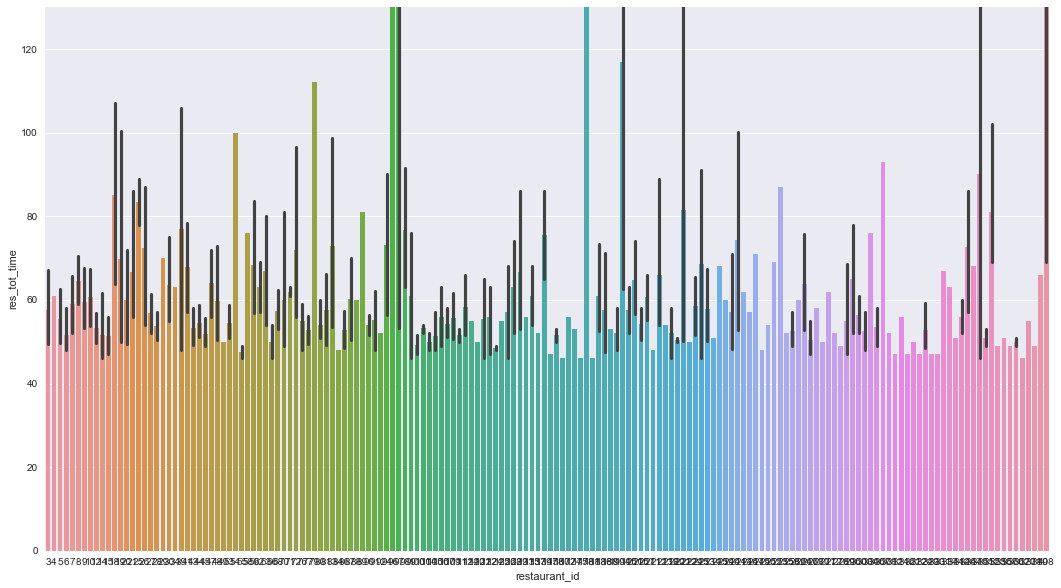

In [213]:
#This could be a potential call to action zone: it looks like restaurants have taken time between 45 an 100 at least most of them
#this can be improved. further analysis on why this happened and what could be done to reverse this pattern would lead to
#more efficient delivery
plt.figure(figsize=(18,10))
sns.barplot(x=x_calc_res, y=y_calc_res, data=df1)
plt.ylim(0, 130)

In [225]:
y_calc1=df1.res_tot_time[df1['res_tot_time'] > 45]

x_calc1=df1.restaurant_id[df1['res_tot_time'] > 45]



In [237]:
t_calc1=df1.day_week_ordered[df1['res_tot_time'] > 45]

(0, 250)

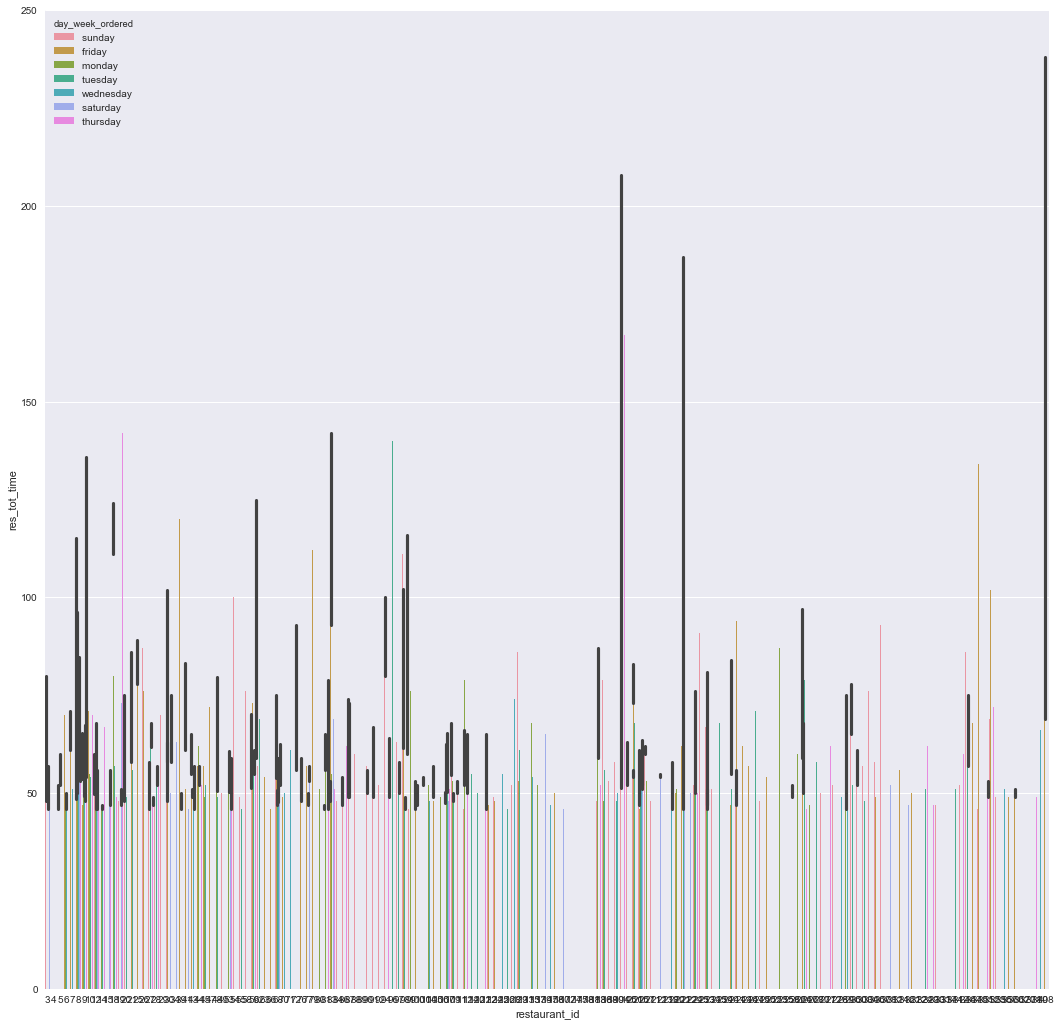

In [230]:
#Tuesday and Sunday seem to have higher median values with regards to time taken to deliver. And surprisingly Friday and Saturday
#seem to have lower median values. But Thursday also popping up with higher values.

plt.figure(figsize=(18,18))
sns.barplot(x=x_calc1, y=y_calc1, hue=t_calc1, data=df1)
plt.ylim(0, 250)

In [57]:
#res_confirm_order_dif Vs. day_week_ordered going to analyze monthly basis
# g21 = sns.boxplot(x=x211, y=y211, hue=s211, data=df)
# plt.ylim(0, 45)
# Now with is_asap=True and considering only positive values show us that on Tuesday in March the max time taken by restaurants
# to confirm is approx 40 min
# On Sunday in March the restaurants have taken more than 40 min approx
# On Friday again the restaurants have taken max 25 min
# On Saturday it is below 20 min

# Cannot derive useful insights with data available only for 29th Feb: restaurants taken max 38 min to confirm order

# But cannot compare that data with what is available for Wednesday in March as data available for entire March

# two trends I am interested in diving deeper:
# 1. Tuesday and Sunday
# 2. Friday and Saturday

# Is it possible to understand customer behavior like their tipping behavior and number of times they have ordered in March
# and how many times from the same restaurant?

# Also could visualize just the 29th of Feb and 29th of March to understand better: is there a pattern towards month end?

In [ ]:
Questions:patterns?
is there a time based incentive for customers to order food: from the same restaurant if delivered well within some time?
Have the same customers ordered many times in March?
Have the same customers ordered from the same restaurant?
tipping percentage?
amount ordered - is there a fluctuation depending on the time food was delivered on past dates?
is a particular driver_id associated with longer delays with respect to delivered time?
is a particular restaurant_id associated with longer delays with respect to confirming the customers orders?
Another significant idea: are there patterns with regards to city and delay in delivery and dow when the order was placed?

In [ ]:
# For this question as below, I would like to visualize deliver_order_dif and res_confirm_order_dif and see with what I can
# get strong signals!
# is there a time based incentive for customers to order food: from the same restaurant if delivered well within some time?
    
# 1. #res_confirm_order_dif: going to consider only positive values and and is_asap=True and only March. somehow have to get
# the customer_id and restaurant_id
# 2. going to plot both ordered time and confirmed time to understand better: with the customer_id and restaurant_id
#I do not have the data for 2 but it is not tough to do so! For now going to concentrate only on 1




#x22, y22, s22=df.day_week_ordered[(df['res_confirm_order_dif']>0) & (df['is_asap']=='t')], df.res_confirm_order_dif[(df['res_confirm_order_dif']>0) & (df['is_asap']=='t')], df.month_det[(df['res_confirm_order_dif']>0) & (df['is_asap']=='t')]

In [58]:
#pickup_deliver_diff Vs. day_week_ordered

x3, y3, s3=df.day_week_ordered[df['pickup_deliver_diff']>0], df.pickup_deliver_diff[df['pickup_deliver_diff']>0], df.is_asap[df['pickup_deliver_diff']>0]



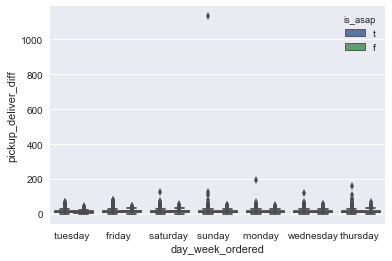

In [59]:
#pickup_deliver_diff Vs. day_week_ordered
g3 = sns.boxplot(x=x3, y=y3, hue=s3, data=df)


(5, 200)

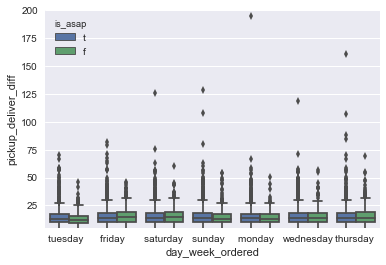

In [60]:
#pickup_deliver_diff Vs. day_week_ordered
g3 = sns.boxplot(x=x3, y=y3, hue=s3, data=df)
plt.ylim(5, 200)

(1, 40)

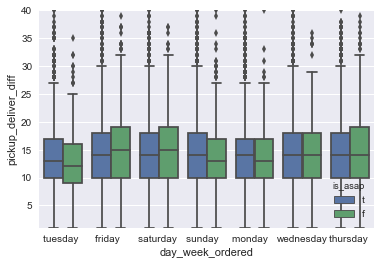

In [61]:
#pickup_deliver_diff Vs. day_week_ordered
#more zoom_in
g3 = sns.boxplot(x=x3, y=y3, hue=s3, data=df)
plt.ylim(1, 40)

#There does not seem to be abnormal patterns in the case of delivery after picking-up the food. Why there are a lot of outliers though?

In [62]:
#res_confirm_pickup_diff Vs. day_week_ordered

x4, y4, s4=df.day_week_ordered[df['res_confirm_pickup_diff']>0], df.res_confirm_pickup_diff[df['res_confirm_pickup_diff']>0], df.is_asap[df['res_confirm_pickup_diff']>0]



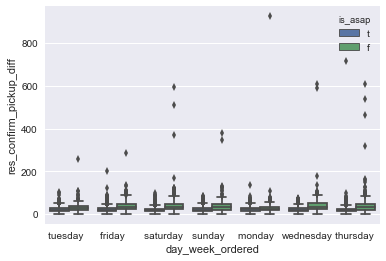

In [63]:
#res_confirm_pickup_diff Vs. day_week_ordered
g4 = sns.boxplot(x=x4, y=y4, hue=s4, data=df)

(1, 60)

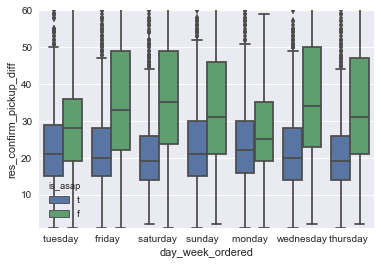

In [64]:
#res_confirm_pickup_diff Vs. day_week_ordered
#This plot has to do with 
g4 = sns.boxplot(x=x4, y=y4, hue=s4, data=df)
plt.ylim(1, 60)

#Friday, Saturday, Wednesday:

In [65]:
#driver_res_pickup_diff Vs. day_week_delivered
x5, y5=df.day_week_delivered[df['driver_res_pickup_diff']>0], df.driver_res_pickup_diff[df['driver_res_pickup_diff']>0]



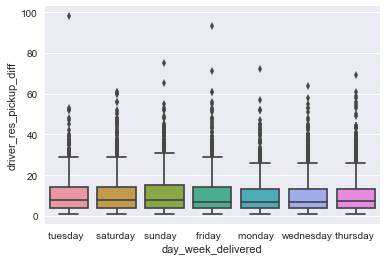

In [66]:
#driver_res_pickup_diff Vs. day_week_delivered: this difference in time will essentially tell how long the drivers been waiting
#at the restaurant to pickup the food
g5 = sns.boxplot(x=x5, y=y5, data=df)


(1, 30)

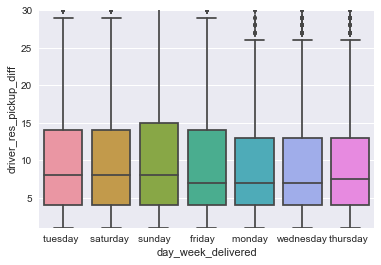

In [67]:
#driver_res_pickup_diff Vs. day_week_delivered
g5 = sns.boxplot(x=x5, y=y5, data=df)

plt.ylim(1, 30)

#Sunday, Friday, Saturday, Tuesday